In [9]:
import pandas as pd
import numpy as np

#Seaborn is a visualization library on top of matplotlib.
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
turnstile = './data/turnstile_weather_v2.csv'
df = pd.read_csv(turnstile, parse_dates=['datetime'])

In [11]:
station_group = df.groupby(['station'], as_index=False) # we don't make `station` being the index
# group by station and aggregate to obtain average ridership per station
ordered = station_group["station", "ENTRIESn_hourly"].aggregate(np.mean).sort("ENTRIESn_hourly")
ordered.head()

,station,ENTRIESn_hourly
76,AQUEDUCT TRACK,0.000000
86,BEACH 36 ST,27.080460
172,ORCHARD BEACH,85.897727
88,BEACH 60 ST,117.939024
87,BEACH 44 ST,175.267857


In [12]:
# list of highest entries
top_stations = list(ordered.tail()["station"])
print(top_stations)

['ROOSEVELT AVE', '34 ST-HERALD SQ', 'MAIN ST', '42 ST-GRD CNTRL', '59 ST-COLUMBUS']


# Define procedures to produce visualization

RAIN number of elements:  42
NO RAIN number of elements:  144


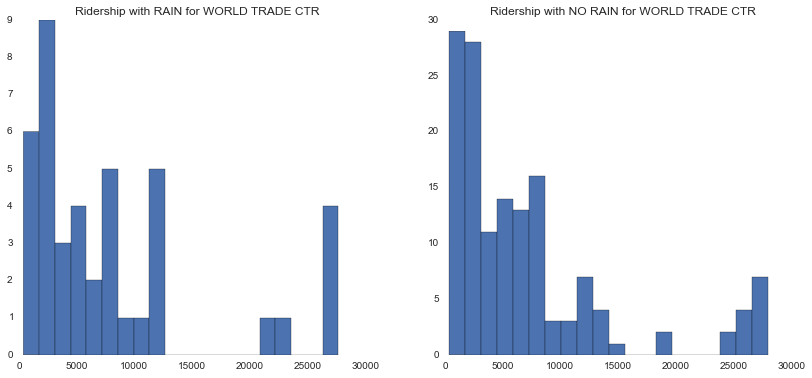

In [27]:
def get_station_data(station_name):
    """Filter subway dataframe for a particular station.
    Return two Pandas Series with ridership data - one for rain and one for non-rain.
    Prints number of elements in each of the series.
    This is a helper function for visulization.
    """
    station_rain = df[ (df["station"] == station_name) & (df["rain"] == 1) ]["ENTRIESn_hourly"]
    station_no_rain = df[ (df["station"] == station_name) & (df["rain"] == 0) ]["ENTRIESn_hourly"]        
    
    print("RAIN number of elements: ", str(len(station_rain)))
    print("NO RAIN number of elements: ", str(len(station_no_rain)))
    
    return station_rain, station_no_rain
          
def histogram_vis(station_name):
    """Produce a figure with two histograms for the particular station.
    One histogram for rain and one for no-rain.
    """
    station_rain, station_no_rain = get_station_data(station_name)
          
    # Find maximum ridership value for this station - used for x-axis limits
    max_value = max(station_rain.max(), station_no_rain.max())
          
    # create figure and axes
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(14,6))
    
    # produce histogram
    # use ax argument to specify axis explicitly
    station_rain.hist(bins=20, ax=ax0)
    ax0.set_xlim(-1, max_value*1.1)
    ax0.set_title("Ridership with RAIN for " + station_name)
    
    station_no_rain.hist(bins=20, ax=ax1)
    ax1.set_xlim(-1, max_value*1.1)
    ax1.set_title("Ridership with NO RAIN for " + station_name)
    
histogram_vis("WORLD TRADE CTR")

# Using iPython interactive features to explore the data in an interactive way

In [26]:
from IPython.html.widgets import interact
import IPython
%matplotlib inline

IPython.__version__

'3.0.0'

RAIN number of elements:  42
NO RAIN number of elements:  143


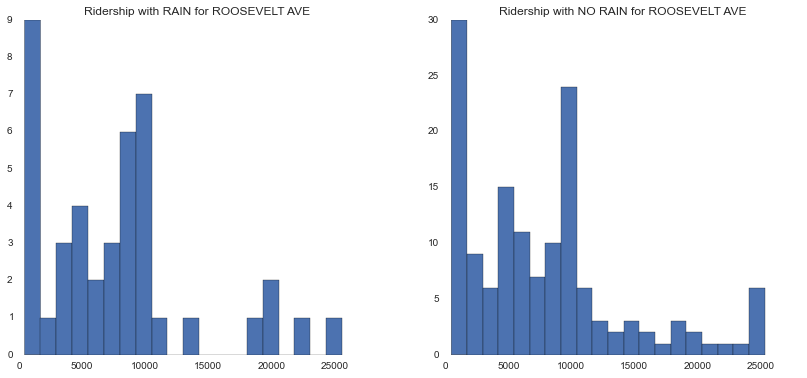

In [28]:
il = interact(histogram_vis, station_name=top_stations)

RAIN number of elements:  42
NO RAIN number of elements:  144


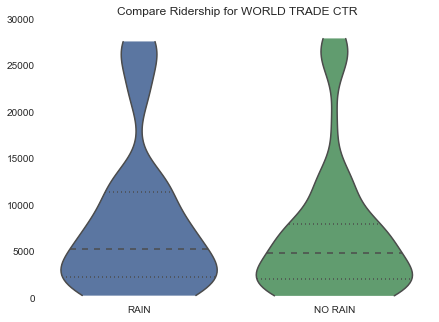

In [29]:
def compare_vis(station_name, type_vis):
    """Produce two visualizations comparing ridership for a fiven station.
    type_vis == "violin", then the two visulaizations are violin plots.
    type_vis == "box", then the two visuliations are box plots
    Uses Seaborn to produce plots.
    """
    station_rain, station_no_rain = get_station_data(station_name)
    
    fig, ax0 = plt.subplots(ncols=1, figsize=(7, 5))
    ax0.set_title("Compare Ridership for " + station_name)
    if type_vis == "box":
        sns.boxplot([station_rain, station_no_rain], names=["RAIN", "NO RAIN"], ax=ax0)
    elif type_vis == "violin":
        # bw sets the binwidth of the kernel density estimator for each of the violins
        sns.violinplot([station_rain, station_no_rain], names=["RAIN", "NO RAIN"], bw=0.3, ax=ax0)
        
compare_vis("WORLD TRADE CTR", "violin")

RAIN number of elements:  42
NO RAIN number of elements:  144


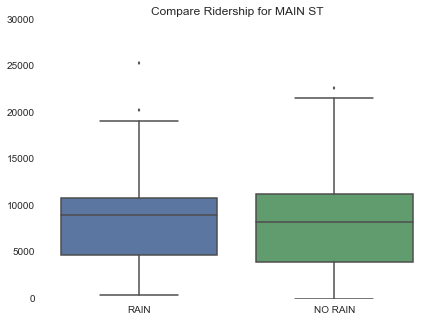

In [30]:
i2 = interact(compare_vis, station_name = top_stations, type_vis = ["box", "violin"])